In [1]:
from numpy import *
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
Xtrain = pd.read_csv('../Data/New/SpacyTrain.csv', index_col=[0])
Xtest = pd.read_csv('../Data/New/SpacyTest.csv', index_col=[0])

In [3]:
Ytrain = Xtrain.label
Xtrain.drop(['label'], axis=1, inplace=True)

In [4]:
Xtrain.head()

,text,texto
train_idx,,
0,i really do recommend this to anyone in need o...,recommend need new player
1,very good every day camera fits nicely in the ...,good day camera fit nicely pocket jean take qu...
2,but dollar for dollar this dvd player is proba...,dollar dollar dvd player probably good
3,i got this phone yesterday and didn t find any...,get phone yesterday find problem
4,price gb of storage,price gb storage


In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk as nlp
from nltk.corpus import stopwords

In [6]:
Xtrain.iloc[1655,:]

text     it has it all
texto              NaN
Name: 1655, dtype: object

In [7]:
Xtrain.iloc[1655,1] = 'perfect'

In [8]:
Xtrain.iloc[1655,:]

text     it has it all
texto          perfect
Name: 1655, dtype: object

In [9]:
# Obtain list of stopwords
stop_words = set(stopwords.words('english'))

In [10]:
tfidf_vectorizador = TfidfVectorizer()
tfidf_vectorizador.fit(Xtrain['texto'])

TfidfVectorizer()

In [11]:
Xtrain = tfidf_vectorizador.fit_transform(Xtrain['texto'])
Xtest = tfidf_vectorizador.transform(Xtest['texto'])

In [12]:
pd.DataFrame(Xtrain.toarray(), columns=tfidf_vectorizador.get_feature_names_out())

,aac,ab,abandon,ability,able,ably,absolute,absolutely,abuse,ac,...,young,youngster,zealand,zen,zennx,zero,zone,zoom,zooming,zs
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3012,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3013,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3014,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [14]:
kf = KFold(n_splits=5, shuffle=True, random_state=0)

In [15]:
models = []
models.append(('glm', LogisticRegression(random_state=99)))
models.append(('dectree', DecisionTreeClassifier(random_state=99)))
models.append(('rf', RandomForestClassifier(random_state=99)))
models.append(('gb', GradientBoostingClassifier(random_state=99)))
models.append(('xgb', XGBClassifier()))
models.append(('bag', BaggingClassifier(random_state=99)))
models.append(('svmr', SVC(random_state=99)))
models.append(('svml', SVC(kernel='linear', random_state=99)))


def boxplots_algorithms(results, names):
    plt.figure(figsize=(8, 8))
    plt.boxplot(results)
    plt.xticks(range(1, len(names) + 1), names)
    plt.show()

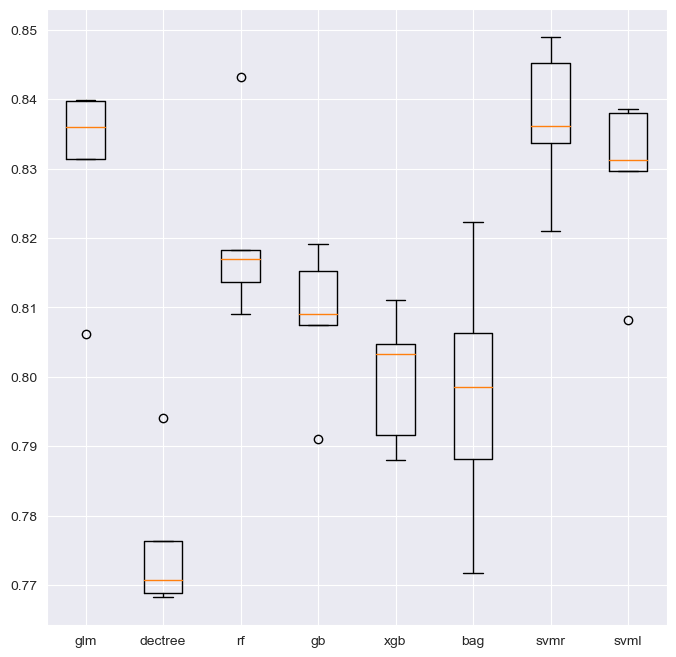

In [16]:
results = []
names = []

for name, model in models:
    acc = cross_val_score(model, Xtrain, Ytrain, cv=kf, scoring='f1')
    names.append(name)
    results.append(acc)

boxplots_algorithms(results, names)

In [17]:
# new
svm = SVC(random_state=99, kernel = 'linear')
svm.fit(Xtrain,Ytrain)
mean(cross_val_score(svm,Xtrain,Ytrain,scoring = 'f1',cv = kf))

0.8291245775229792

In [18]:
mean(cross_val_score(svm,Xtrain,Ytrain,scoring = 'accuracy',cv = kf))

0.7708883836886209

In [19]:
data = pd.DataFrame(svm.coef_.toarray(), columns=tfidf_vectorizador.get_feature_names_out())
data

,aac,ab,abandon,ability,able,ably,absolute,absolutely,abuse,ac,...,young,youngster,zealand,zen,zennx,zero,zone,zoom,zooming,zs
0,-0.459634,-0.41374,0.0,0.150207,0.274799,0.199834,0.440545,0.480714,0.0,-0.041002,...,-0.267422,0.0,0.440601,0.449767,-0.269144,-0.838433,-0.604888,-0.066512,-0.388692,0.222569


In [20]:
data = data.T
data

,0
aac,-0.459634
ab,-0.413740
abandon,0.000000
ability,0.150207
able,0.274799
...,...
zero,-0.838433
zone,-0.604888
zoom,-0.066512
zooming,-0.388692


In [21]:
data['abs'] = abs(data)
data.reset_index(inplace= True)
data.sort_values(by = 'abs', ascending= False)

,index,0,abs
1277,great,2.789052,2.789052
922,easy,2.393591,2.393591
1261,good,2.329370,2.329370
2560,scratch,-2.322731,2.322731
1709,love,2.279187,2.279187
...,...,...,...
3104,undecided,0.000000,0.000000
942,eject,0.000000,0.000000
2864,styling,0.000000,0.000000
3101,uncomplicated,0.000000,0.000000


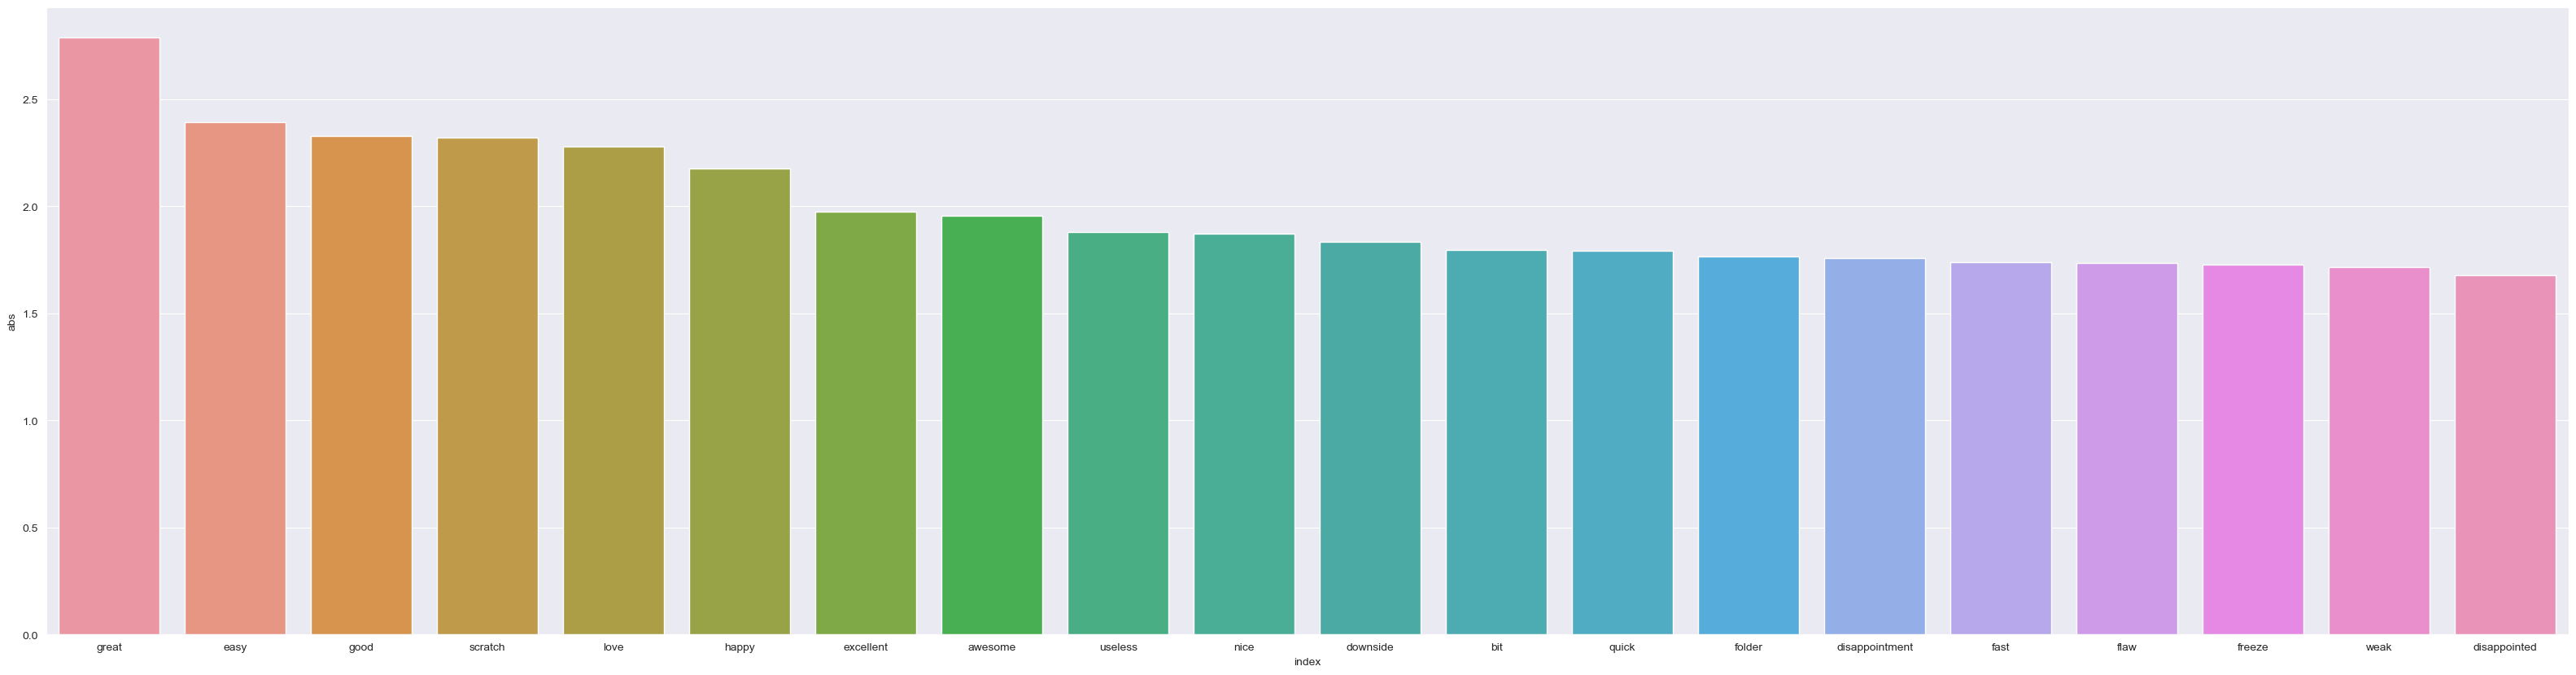

In [22]:
data = data.sort_values(by = 'abs', ascending= False)
plt.figure(figsize=(40,10))
sns.barplot(data = data.iloc[:20,:], x = 'index' ,y = 'abs')
plt.show()